# Disclaimer: for fair comparison, penalties MUST be always null, to check everytime it is launched.

In [1]:
import os
import time

# Self-code imports
import polytopes.segmentation_algorithms as algos
from polytopes.model.note import Note
from polytopes.model.chord import Chord
import polytopes.polytopical_costs as pc
import polytopes.data_manipulation as dm
import polytopes.segmentation_helper as sh
import polytopes.pattern_manip as pm
import polytopes.pattern_factory as pf

#Generic imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import copy

In [2]:
database_path = "C:\\Users\\amarmore\\Desktop\\Projects\\RWC_annotations\\final_bimbot_al\\"
annotations_folder_path = "C:\\Users\\amarmore\\Desktop\\Audio samples\\RWC Pop\\annotations\\final_bimbot\\"
persisted_path = "C:\\Users\\amarmore\\Desktop\\data_persisted"

max_size = 42

manual = []

for file in os.listdir(database_path):
    bag_of_words = file.split(".")
    if bag_of_words[-1] == "seq":
        if bag_of_words[-3] == "manual":
            manual.append(file)

CURR_DIR = os.path.dirname(os.path.realpath("__file__"))


In [3]:
def print_res_for_songs_range(all_res, context = ""):
    results = np.array(all_res)
    prec, rap, fmes = round(np.mean(results[:,0]),4), round(np.mean(results[:,1]),4), round(np.mean(results[:,2]),4)
    print("Context: {}, prec: {}, rap: {}, F measure: {}".format(context, prec, rap, fmes))

# Marmoret

## Marmoret-Cohen cost

c:\users\amarmore\desktop\projects\phd main projects\on git\code\polytopes and relation\polytopes\segmentation_algorithms.py:239: UserWarning: No Polytope is available for this size of segment. Trying sequential cost instead.
  warnings.warn("No Polytope is available for this size of segment. Trying sequential cost instead.")


Context: Zero Tolerance, prec: 0.3721, rap: 0.5916, F measure: 0.4505
Context: Three Tolerance, prec: 0.4198, rap: 0.6688, F measure: 0.5086


[]

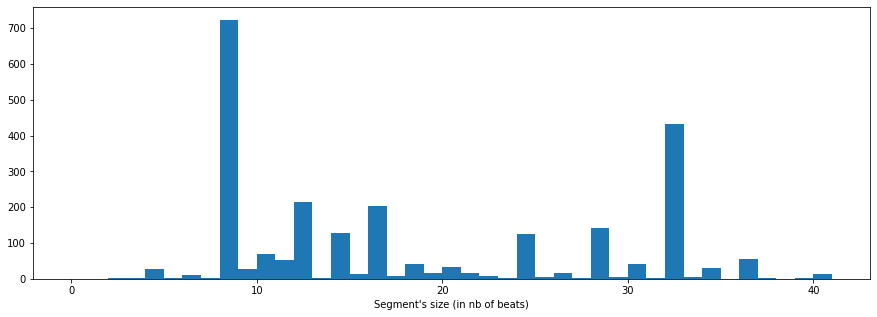

In [4]:
mc_all_res_zero_tol = []
mc_all_res_three_tol = []
mc_all_frontiers = []
mc_distrib_segments = []

for song in manual:
    song_number = song.split(".")[0]

    bag_of_chords = dm.flowify_song(database_path + song)

    try:
        frontiers = np.load("{}\\persisted_content\\estimated_frontiers\\marmoret_cohen_song{}_penalties{}_maxsize{}.npy".format(CURR_DIR, song_number, (0,0), max_size), allow_pickle = True)
    except FileNotFoundError:
        frontiers, cost = algos.dynamic_minimization_cohen_marmoret(bag_of_chords, segment_size_penalty = 0, min_size = 8, max_size = max_size, target_size = 32, irregularity_penalty = 0)
        fro = np.array(frontiers, dtype=object)
        np.save("{}\\persisted_content\\estimated_frontiers\\marmoret_cohen_song{}_penalties{}_maxsize{}".format(CURR_DIR, song_number, (0,0), max_size), fro)

    mc_all_frontiers.append(frontiers)
    
    for fst, snd in zip(frontiers[:-1], frontiers[1:]):
        mc_distrib_segments.append(snd - fst)

    #Scores, computed on the beat annotation
    beat_indexed_segments = dm.frontiers_to_segments(frontiers)

    annot_name = "{:03d}.manual.seg".format(int(song_number))
    annotation_file = open(annotations_folder_path + annot_name,'r')
    annotation = annotation_file.read().replace("\n", "").split(" ")
    annotation = np.array([int(x) - 1 for x in annotation])
    beat_indexed_annotation = np.array(dm.frontiers_to_segments(annotation))
    
    p,r,f = dm.compute_score_of_segmentation(beat_indexed_annotation, beat_indexed_segments, 
                                                               window_length = 0.2)
    mc_all_res_zero_tol.append([p,r,f])
    
    p_3,r_3,f_3 = dm.compute_score_of_segmentation(beat_indexed_annotation, beat_indexed_segments, 
                                                                window_length = 3)
    mc_all_res_three_tol.append([p_3,r_3,f_3])

print_res_for_songs_range(mc_all_res_zero_tol, context = "Zero Tolerance")
print_res_for_songs_range(mc_all_res_three_tol, context = "Three Tolerance")
plt.figure(figsize=(15,5))
plt.hist(mc_distrib_segments, bins = range(max_size))
plt.xlabel("Segment's size (in nb of beats)")
#plt.title("Prec: {}, rap: {}, F measure: {}".format(prec, rap, fmes))
plt.plot()

In [5]:
stop

NameError: name 'stop' is not defined

## Louboutaoua cost

In [ ]:
m_all_res_zero_tol = []
m_all_res_three_tol = []
m_all_frontiers = []
m_distrib_segments = []
m_cost_sum = 0
m_cost_nb = 0

for song in manual:
    song_number = song.split(".")[0]

    bag_of_chords = dm.flowify_song(database_path + song)

    try:
        frontiers = np.load("{}\\persisted_content\\estimated_frontiers\\marmoret_louboutaoua_song{}_penalties{}_maxsize{}.npy".format(CURR_DIR, song_number, (0,0), max_size), allow_pickle = True)
    except FileNotFoundError:
        frontiers, cost = algos.dynamic_minimization_louboutaoua(bag_of_chords, segment_size_penalty = 0, min_size = 8, max_size = max_size, target_size = 32, irregularity_penalty = 0)
        fro = np.array(frontiers, dtype=object)
        np.save("{}\\persisted_content\\estimated_frontiers\\marmoret_louboutaoua_song{}_penalties{}_maxsize{}".format(CURR_DIR, song_number, (0,0), max_size), fro)

    m_all_frontiers.append(frontiers)
    #m_cost_sum += cost
    #m_cost_nb += len(frontiers) - 1
    
    for fst, snd in zip(frontiers[:-1], frontiers[1:]):
        m_distrib_segments.append(snd - fst)

    #Scores, computed on the beat annotation
    beat_indexed_segments = dm.frontiers_to_segments(frontiers)

    annot_name = "{:03d}.manual.seg".format(int(song_number))
    annotation_file = open(annotations_folder_path + annot_name,'r')
    annotation = annotation_file.read().replace("\n", "").split(" ")
    annotation = np.array([int(x) - 1 for x in annotation])
    beat_indexed_annotation = np.array(dm.frontiers_to_segments(annotation))
    
    p,r,f = dm.compute_score_of_segmentation(beat_indexed_annotation, beat_indexed_segments, 
                                                               window_length = 0.2)
    m_all_res_zero_tol.append([p,r,f])
    
    p_3,r_3,f_3 = dm.compute_score_of_segmentation(beat_indexed_annotation, beat_indexed_segments, 
                                                                window_length = 3)
    m_all_res_three_tol.append([p_3,r_3,f_3])

print_res_for_songs_range(m_all_res_zero_tol, context = "Zero Tolerance")
print_res_for_songs_range(m_all_res_three_tol, context = "Three Tolerance")
#print("Averaged cost for a polytope: {}".format(m_cost_sum/m_cost_nb))
plt.figure(figsize=(15,5))
plt.hist(m_distrib_segments, bins = range(max_size))
plt.xlabel("Segment's size (in nb of beats)")
#plt.title("Prec: {}, rap: {}, F measure: {}".format(prec, rap, fmes))
plt.plot()

# Guichaoua

## Local

In [ ]:
g_all_res_zero_tol = []
g_all_res_three_tol = []
g_all_frontiers = []
g_distrib_segments = []

for song in manual:
    song_number = song.split(".")[0]

    bag_of_chords = dm.flowify_song(database_path + song)
    try:
        frontiers = np.load("{}\\persisted_content\\estimated_frontiers\\guichaoua_song{}_penalties{}_maxsize{}.npy".format(CURR_DIR, song_number, (0,0), max_size), allow_pickle = True)
    except FileNotFoundError:
        frontiers, cost = algos.dynamic_minimization_guichaoua(bag_of_chords, 
                                                                   positive_segment_size_penalty = 0, negative_segment_size_penalty = 0,
                                                                   min_size = 8, max_size = max_size, target_size = 32, 
                                                                   positive_penalty = 0, negative_penalty = 0,
                                                                   global_antecedents = False)
        fro = np.array(frontiers, dtype=object)
        np.save("{}\\persisted_content\\estimated_frontiers\\guichaoua_song{}_penalties{}_maxsize{}".format(CURR_DIR, song_number, (0,0), max_size), fro)

    g_all_frontiers.append(frontiers)
    
    for fst, snd in zip(frontiers[:-1], frontiers[1:]):
        g_distrib_segments.append(snd - fst)

    #Scores, computed on the beat annotation
    beat_indexed_segments = dm.frontiers_to_segments(frontiers)

    annot_name = "{:03d}.manual.seg".format(int(song_number))
    annotation_file = open(annotations_folder_path + annot_name,'r')
    annotation = annotation_file.read().replace("\n", "").split(" ")
    annotation = np.array([int(x) - 1 for x in annotation])
    beat_indexed_annotation = np.array(dm.frontiers_to_segments(annotation))
    
    p,r,f = dm.compute_score_of_segmentation(beat_indexed_annotation, beat_indexed_segments, 
                                                               window_length = 0.2)
    g_all_res_zero_tol.append([p,r,f])
    
    p_3,r_3,f_3 = dm.compute_score_of_segmentation(beat_indexed_annotation, beat_indexed_segments, 
                                                                window_length = 3)
    g_all_res_three_tol.append([p_3,r_3,f_3])

print_res_for_songs_range(g_all_res_zero_tol, context = "Zero Tolerance")
print_res_for_songs_range(g_all_res_three_tol, context = "Three Tolerance")
plt.figure(figsize=(15,5))
plt.hist(g_distrib_segments, bins = range(max_size))
plt.xlabel("Segment's size (in nb of beats)")
#plt.title("Prec: {}, rap: {}, F measure: {}".format(prec, rap, fmes))
plt.plot()

## Global

In [ ]:
g_all_res_zero_tol = []
g_all_res_three_tol = []
g_all_frontiers = []
g_distrib_segments = []
#g_cost_sum = 0
#g_cost_nb = 0

for song in manual:
    song_number = song.split(".")[0]

    bag_of_chords = dm.flowify_song(database_path + song)
    try:
        frontiers = np.load("{}\\persisted_content\\estimated_frontiers\\guichaoua_global_song{}_penalties{}_maxsize{}.npy".format(CURR_DIR, song_number, (0,0), max_size), allow_pickle = True)
    except FileNotFoundError:
        frontiers, cost = algos.dynamic_minimization_guichaoua(bag_of_chords,
                                                                   positive_segment_size_penalty = 0, negative_segment_size_penalty = 0,
                                                                   min_size = 8, max_size = max_size, target_size = 32, 
                                                                   positive_penalty = 0, negative_penalty = 0,
                                                                   global_antecedents = True)
        fro = np.array(frontiers, dtype=object)
        np.save("{}\\persisted_content\\estimated_frontiers\\guichaoua_global_song{}_penalties{}_maxsize{}".format(CURR_DIR, song_number, (0,0), max_size), fro)

    g_all_frontiers.append(frontiers)
    #g_cost_sum += cost
    #g_cost_nb += len(frontiers) - 1
    
    for fst, snd in zip(frontiers[:-1], frontiers[1:]):
        g_distrib_segments.append(snd - fst)

    #Scores, computed on the beat annotation
    beat_indexed_segments = dm.frontiers_to_segments(frontiers)

    annot_name = "{:03d}.manual.seg".format(int(song_number))
    annotation_file = open(annotations_folder_path + annot_name,'r')
    annotation = annotation_file.read().replace("\n", "").split(" ")
    annotation = np.array([int(x) - 1 for x in annotation])
    beat_indexed_annotation = np.array(dm.frontiers_to_segments(annotation))
    
    p,r,f = dm.compute_score_of_segmentation(beat_indexed_annotation, beat_indexed_segments, 
                                                               window_length = 0.2)
    g_all_res_zero_tol.append([p,r,f])
    
    p_3,r_3,f_3 = dm.compute_score_of_segmentation(beat_indexed_annotation, beat_indexed_segments, 
                                                                window_length = 3)
    g_all_res_three_tol.append([p_3,r_3,f_3])

print_res_for_songs_range(g_all_res_zero_tol, context = "Zero Tolerance")
print_res_for_songs_range(g_all_res_three_tol, context = "Three Tolerance")
#print("Averaged cost for a polytope: {}".format(g_cost_sum/g_cost_nb))
plt.figure(figsize=(15,5))
plt.hist(g_distrib_segments, bins = range(max_size))
plt.xlabel("Segment's size (in nb of beats)")
#plt.title("Prec: {}, rap: {}, F measure: {}".format(prec, rap, fmes))
plt.plot()

# Louboutin

In [ ]:
l_all_res_zero_tol = []
l_all_res_three_tol = []
l_all_frontiers = []
l_distrib_segments = []
l_cost_sum = 0
l_cost_nb = 0

for song in manual:
    song_number = song.split(".")[0]

    bag_of_chords = dm.flowify_song(database_path + song)

    try:
        fro = np.load("{}\\persisted_content\\estimated_frontiers\\louboutin_song{}_penalties{}_maxsize{}.npy".format(CURR_DIR, song_number, (0,0), max_size), allow_pickle = True)
    except FileNotFoundError:
        frontiers, cost = algos.dynamic_minimization_louboutin(bag_of_chords, segment_size_penalty = 0, min_size = 8, max_size = max_size, target_size = 32, irregularity_penalty = 0)
        fro = np.array(frontiers, dtype=object)
        np.save("{}\\persisted_content\\estimated_frontiers\\louboutin_song{}_penalties{}_maxsize{}".format(CURR_DIR, song_number, (0,0), max_size), fro)

    l_cost_sum += cost
    l_cost_nb += len(frontiers) - 1

    l_all_frontiers.append(frontiers)
    
    for fst, snd in zip(frontiers[:-1], frontiers[1:]):
        l_distrib_segments.append(snd - fst)

    #Scores, computed on the beat annotation
    beat_indexed_segments = dm.frontiers_to_segments(frontiers)

    annot_name = "{:03d}.manual.seg".format(int(song_number))
    annotation_file = open(annotations_folder_path + annot_name,'r')
    annotation = annotation_file.read().replace("\n", "").split(" ")
    annotation = np.array([int(x) - 1 for x in annotation])
    beat_indexed_annotation = np.array(dm.frontiers_to_segments(annotation))
    
    p,r,f = dm.compute_score_of_segmentation(beat_indexed_annotation, beat_indexed_segments, 
                                                               window_length = 0.2)
    l_all_res_zero_tol.append([p,r,f])
    
    p_3,r_3,f_3 = dm.compute_score_of_segmentation(beat_indexed_annotation, beat_indexed_segments, 
                                                                window_length = 3)
    l_all_res_three_tol.append([p_3,r_3,f_3])

print_res_for_songs_range(l_all_res_zero_tol, context = "Zero Tolerance")
print_res_for_songs_range(l_all_res_three_tol, context = "Three Tolerance")
print("Averaged cost for a polytope: {}".format(l_cost_sum/l_cost_nb))
plt.figure(figsize=(15,5))
plt.hist(l_distrib_segments, bins = range(max_size))
plt.xlabel("Segment's size (in nb of beats)")
#plt.title("Prec: {}, rap: {}, F measure: {}".format(prec, rap, fmes))
plt.plot()